In [30]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.4.1
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
import os
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Model-1

In [ ]:
X = []
y = []
IMG_SIZE = 224
DIR = "/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train"
folders1 = os.listdir(DIR)
folders1

['Covid-19', 'STB-NATB', 'Normal', 'Viral Pneumonia']

In [ ]:

for i, file in enumerate(folders1):
    filename = os.path.join(DIR, file)
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            y.append(i)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, i))



Folder Covid-19 started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/desktop.ini not read
Folder Covid-19 done
The folder Covid-19 is labeled as 0
Folder STB-NATB started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/STB-NATB/desktop.ini not read
Folder STB-NATB done
The folder STB-NATB is labeled as 1
Folder Normal started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Normal/desktop.ini not read
Folder Normal done
The folder Normal is labeled as 2
Folder Viral Pneumonia started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Viral Pneumonia/desktop.ini not read
Folder Viral Pneumonia done
The folder Viral Pneumonia is labeled as 3


In [ ]:
len(X)

2990

[78, 482, 436, 123, 464, 814, 21, 382, 11, 471]


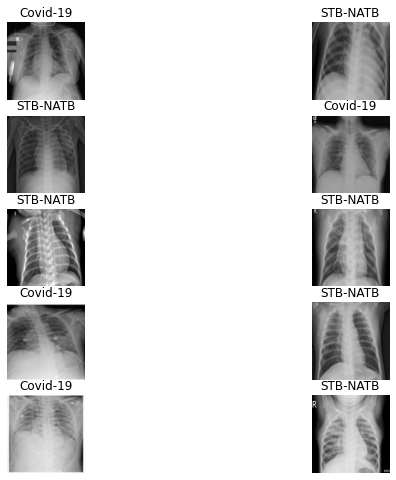

In [ ]:
import random
from random import sample
plt.figure(figsize=(10,10))
random_indexes = sample(range(1, 825), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(6,2, i + 1)
  sp.set_title(folders1[y[img_index]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(X[img_index])


In [ ]:
X = np.array(X)
y = np.array(y)

print("X shape is {}".format(X.shape))
print("y shape is {}".format(y.shape))

X shape is (2990, 224, 224, 3)
y shape is (2990,)


In [ ]:
from tensorflow.keras.utils import to_categorical

print("Before the categorical the shape of y is {}".format(y.shape))
y = to_categorical(y)
print("After the categorical the shape of y is {}".format(y.shape))

Before the categorical the shape of y is (2990,)
After the categorical the shape of y is (2990, 4)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("There are {} training examples".format(X_train.shape[0]))
print("There are {} test examples".format(X_test.shape[0]))

There are 2242 training examples
There are 748 test examples


In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
      rescale = 1./255)

In [ ]:
training_set=training_datagen.flow(X_train,y_train)
test_set=validation_datagen.flow(X_test,y_test)

In [ ]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3",
# Here we will be using imagenet weights\n"
IMAGE_SIZE=[224,224]
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights\n",
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/*')
len(folders)

4

In [ ]:
x = Flatten()(vgg.output)

In [ ]:

prediction=Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
batch_size=32
r= model.fit_generator(training_set,epochs = 20, validation_data = test_set,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
70/70 [==============================] - 38s 544ms/step - loss: 0.7434 - accuracy: 0.6810 - val_loss: 0.7313 - val_accuracy: 0.7126
Epoch 2/20
70/70 [==============================] - 38s 541ms/step - loss: 0.7187 - accuracy: 0.7027 - val_loss: 0.7939 - val_accuracy: 0.6471
Epoch 3/20
70/70 [==============================] - 38s 539ms/step - loss: 0.9298 - accuracy: 0.6742 - val_loss: 0.8456 - val_accuracy: 0.6618
Epoch 4/20
70/70 [==============================] - 38s 546ms/step - loss: 0.7185 - accuracy: 0.7005 - val_loss: 0.7999 - val_accuracy: 0.6417
Epoch 5/20
70/70 [==============================] - 38s 541ms/step - loss: 0.6754 - accuracy: 0.7127 - val_loss: 0.9063 - val_accuracy: 0.6872
Epoch 6/20
70/70 [==============================] - 38s 542ms/step - loss: 0.6021 - accuracy: 0.7285 - val_loss: 0.7979 - val_accuracy: 0.7206
Epoch 7/20
70/70 [==============================] - 38s 545ms/step - loss: 0.6007 - accuracy: 0.7258 - val_loss: 0.7201 - val_accuracy: 0.7032

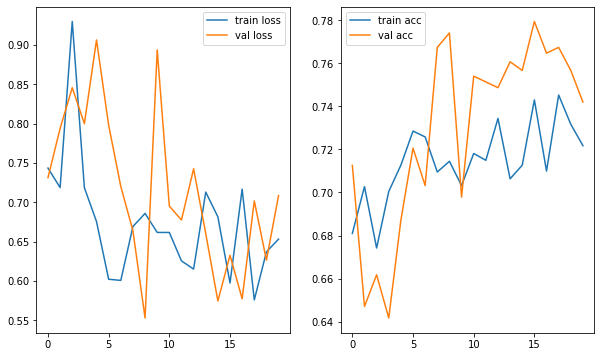

In [ ]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [ ]:
k=r.history['val_accuracy']
print('The Validation Accuracy of VGG19 Model: ', np.array(k[-1]))

The Validation Accuracy of VGG19 Model:  0.7419785857200623


In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('Birds_model_vgg19.h5')

In [ ]:
y_pred = model.predict(X_test)
y_pred_digits = np.argmax(y_pred, axis=1)
y_pred_digits

y_pred_labels = np.unique(y_pred_digits, return_counts=True)
y_pred_labels


(array([0, 1, 2, 3]), array([  9, 171, 511,  57]))

In [ ]:
real_labels= np.argmax(y_test, axis=1)
real_labels
real_labels1 = np.unique(real_labels, return_counts=True)
real_labels1

(array([0, 1, 2, 3]), array([ 77, 250, 150, 271]))

In [ ]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(real_labels, y_pred_digits)
c_m

array([[  8,   6,  37,  26],
       [  0,  70, 173,   7],
       [  0,   1, 148,   1],
       [  1,  94, 153,  23]])

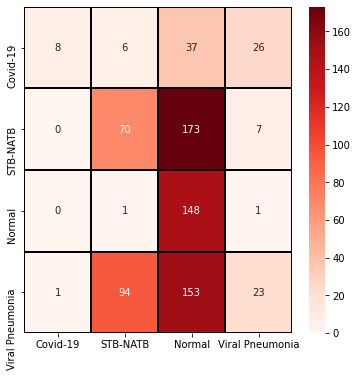

In [ ]:

import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = folders1 , yticklabels = folders1)

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(real_labels, y_pred_digits)
acc_score

0.33288770053475936

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(real_labels)):
    if(real_labels[i] == y_pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==10):
        break
i=0
for i in range(len(real_labels)):
    if(real_labels[i] != y_pred_digits[i]):
        mis_class.append(i)


In [ ]:
print(len(mis_class))

499


In [ ]:
The folder Covid-19 is labeled as 0
Folder STB-NATB started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/STB-NATB/desktop.ini not read
Folder STB-NATB done
The folder STB-NATB is labeled as 1
Folder Normal started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Normal/desktop.ini not read
Folder Normal done
The folder Normal is labeled as 2
Folder Viral Pneumonia started
File /content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Viral Pneumonia/desktop.ini not read
Folder Viral Pneumonia done
The folder Viral Pneumonia is labeled as 3

[7, 0, 2, 5, 1, 3, 9, 6, 4, 8]


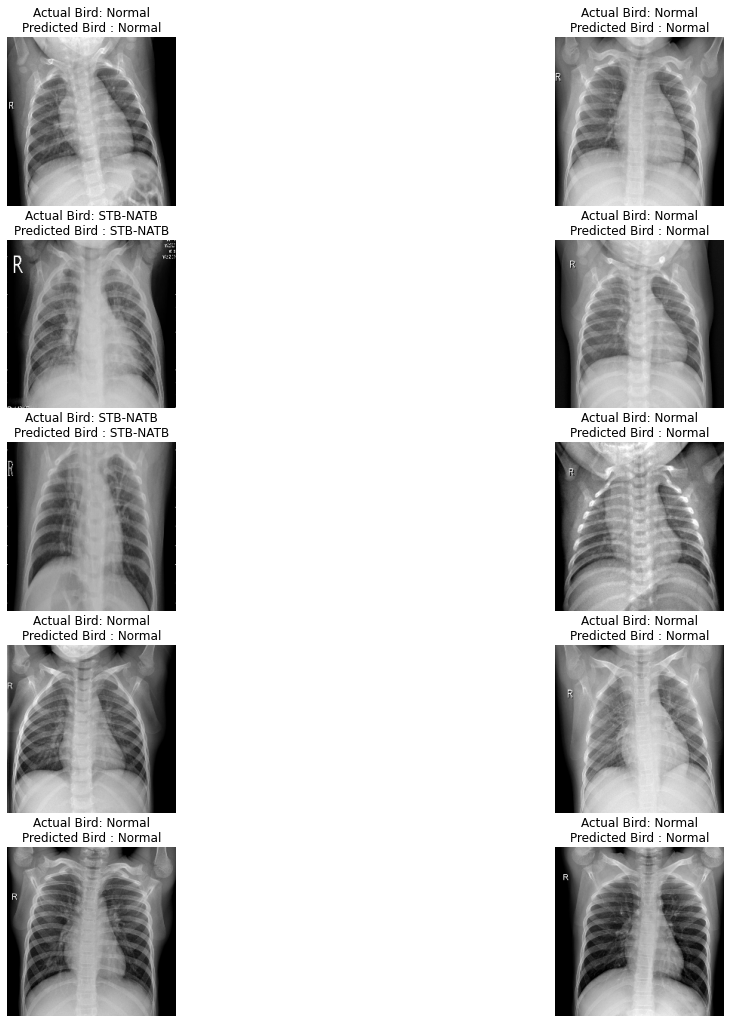

In [ ]:
labels_names={0:'Covid-19', 
        1:'STB-NATB',
        2:'Normal',
        3:'Pneumonia'}
#fig.set_size_inches(8,8)
import random
from random import sample
plt.figure(figsize=(18,18))
random_indexes = sample(range(0, 10), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual Bird: '+ labels_names[real_labels[prop_class[img_index]]]+ '\n' + 'Predicted Bird : ' + labels_names[y_pred_digits[prop_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(X_test[prop_class[img_index]])

[7, 8, 1, 4, 2, 6, 3, 0, 5, 9]


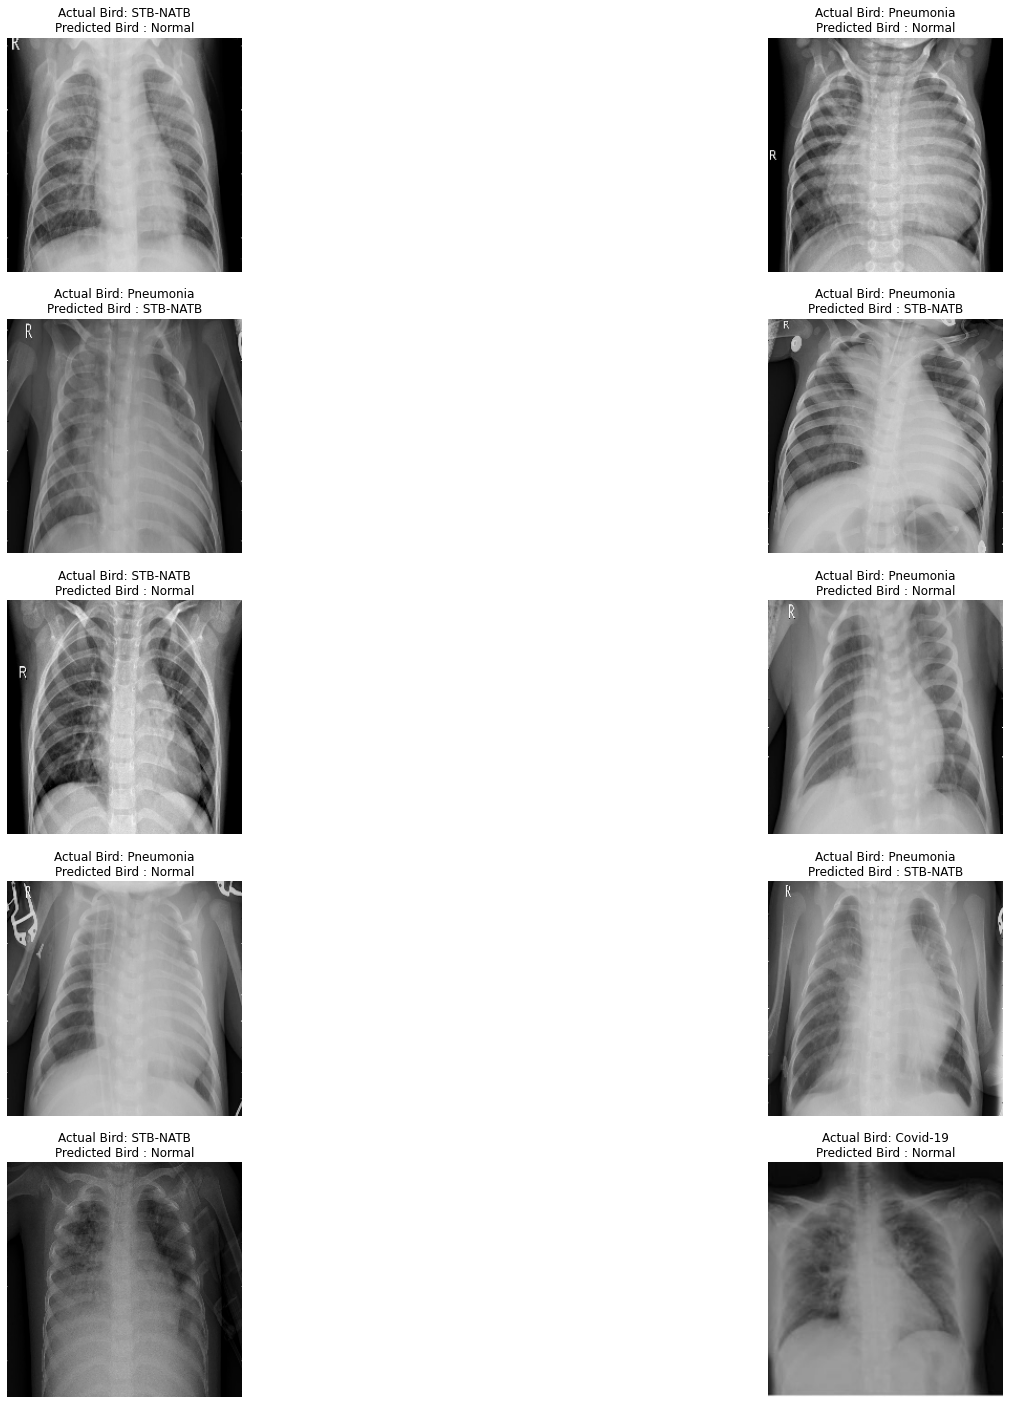

In [ ]:
labels_names={0:'Covid-19', 
        1:'STB-NATB',
        2:'Normal',
        3:'Pneumonia'}
import random
from random import sample

random_indexes = sample(range(0, 10), 10)
print(random_indexes)
plt.figure(figsize=(25,25))
for i, img_index in enumerate(random_indexes):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual Bird: '+ labels_names[real_labels[mis_class[img_index]]]+ '\n' + 'Predicted Bird : ' + labels_names[y_pred_digits[mis_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(X_test[mis_class[img_index]])

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('Birds_model_vgg19.h5')

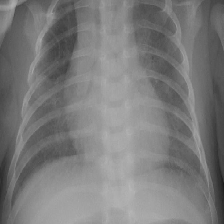

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg',target_size=(224,224))
img

In [ ]:
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
imgy=preprocess_input(y)
imgy=imgy/255

In [ ]:
preds= model.predict(imgy)
preds

array([[0.00089475, 0.6948929 , 0.00134372, 0.30286863]], dtype=float32)

In [ ]:
a=np.argmax(preds, axis=1)
a

array([1])

In [ ]:
labels_names={0:'Covid-19', 
        1:'STB-NATB',
        2:'Normal',
        3:'Pneumonia'}

In [ ]:
if(a==0):
    print("Covid-19")
elif(a==1):
    print("STB-NATB")
elif(a==2):
    print("Normal")
else:
    print("Pneumonia")

STB-NATB


## Model-2

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras as kf
import cv2
import numpy as np

In [ ]:
# creating data generator for training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# creating data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# loading the training data after required modifications
train_data = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode = 'rgb')

# loading validation data after required modifications
validation_data = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode = 'rgb')

Found 9095 images belonging to 4 classes.
Found 2973 images belonging to 4 classes.


In [ ]:
# making the convolutional model iusing VGG19 architecture
conv_model = tf.keras.applications.VGG19(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape= [224, 224] + [3],
    pooling=None,
)

In [ ]:
# making classifier

# flattening the output of the convolutional part
x = kf.layers.Flatten()(conv_model.output)

# three hidden layers
x = kf.layers.Dense(100, activation='relu')(x)
x = kf.layers.Dense(100, activation='relu')(x)
x = kf.layers.Dense(100, activation='relu')(x)

# output layer
predictions = kf.layers.Dense(4, activation='softmax')(x)

In [ ]:
# attaching both the convolutional model and the classification model
full_model = kf.models.Model(inputs=conv_model.input, outputs=predictions)

In [ ]:
# printing the summary of the full model (convolutional model and classification model)
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# making CNN training false
for layer in conv_model.layers:
  layer.trainable = False

In [ ]:
# complling the model
full_model.compile(loss='categorical_crossentropy',
                  optimizer=kf.optimizers.Adamax(lr=0.001),
                  metrics=['accuracy'])

In [ ]:
# fitting data into the final model using .fit_generator function
# .fit_generator function is being used for handling huge data
results = full_model.fit_generator(
  train_data,
  validation_data= validation_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_set)
)

Epoch 1/5
285/285 [==============================] - 2684s 9s/step - loss: 1.1633 - accuracy: 0.5236 - val_loss: 1.4613 - val_accuracy: 0.3750
Epoch 2/5
285/285 [==============================] - 417s 1s/step - loss: 0.8001 - accuracy: 0.6788 - val_loss: 1.3118 - val_accuracy: 0.4128
Epoch 3/5
285/285 [==============================] - 367s 1s/step - loss: 0.7332 - accuracy: 0.7159 - val_loss: 1.3671 - val_accuracy: 0.4128
Epoch 4/5
285/285 [==============================] - 334s 1s/step - loss: 0.7316 - accuracy: 0.7100 - val_loss: 1.4331 - val_accuracy: 0.3346
Epoch 5/5
285/285 [==============================] - 300s 1s/step - loss: 0.6969 - accuracy: 0.7231 - val_loss: 1.4904 - val_accuracy: 0.3776


In [ ]:
# saving the trained model
# accuracy 97.96 %
filepath = './model_trained/model_1.h5'
full_model.save(filepath)

## Model-3

Package and Data Loading

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train'
valid_path = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test'

In [ ]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG19",
# Here we will be using imagenet weights\n"
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/*')
len(folders)

4

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction=Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 9095 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2973 images belonging to 4 classes.


In [ ]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
569/569 [==============================] - 3412s 6s/step - loss: 2.2120 - accuracy: 0.2295 - val_loss: 1.3862 - val_accuracy: 0.2543
Epoch 2/10
569/569 [==============================] - 237s 417ms/step - loss: 1.3862 - accuracy: 0.2487 - val_loss: 1.3863 - val_accuracy: 0.2543
Epoch 3/10
569/569 [==============================] - 238s 418ms/step - loss: 1.3865 - accuracy: 0.2499 - val_loss: 1.3863 - val_accuracy: 0.2543
Epoch 4/10
569/569 [==============================] - 238s 419ms/step - loss: 1.3864 - accuracy: 0.2527 - val_loss: 1.3861 - val_accuracy: 0.2543
Epoch 5/10
569/569 [==============================] - 237s 416ms/step - loss: 1.3863 - accuracy: 0.2567 - val_loss: 1.3861 - val_accuracy: 0.2543
Epoch 6/10
569/569 [==============================] - 235s 413ms/step - loss: 1.3864 - accuracy: 0.2502 - val_loss: 1.3861 - val_accuracy: 0.2543
Epoch 7/10
569/569 [==============================] - 238s 418ms/step - loss: 1.3862 - accuracy: 0.2573 - val_loss: 1.3862 - v

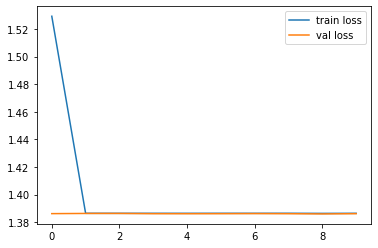

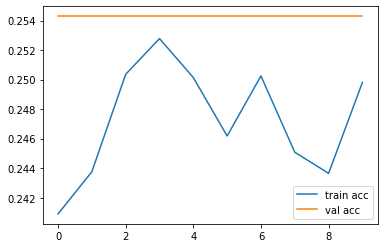

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('fruits_model_vgg19.h5')

y_pred = model.predict(test_set)
y_pred

array([[0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ],
       [0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ],
       [0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ],
       ...,
       [0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ],
       [0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ],
       [0.24789332, 0.2470354 , 0.2509167 , 0.2541546 ]], dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
len(y_pred)

2973

In [ ]:
np.array(y_pred==0).sum()

0

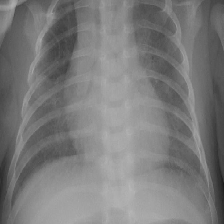

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruits_model_vgg19.h5')
img=image.load_img('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg',target_size=(224,224))
img


## Model-4 (Inception-1)

In [ ]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [ ]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 3

#define paths
covid19 = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19'
normal = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Normal'
natb = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/STB-NATB'
penumonia = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/STB-NATB'


# Use glob to grab images from path .jpg or jpeg
covid19_files = glob(covid19 + '/*')
normal_files = glob(normal + '/*')
natb_files= glob(natb + '/*')
penumonia_files= glob(penumonia + '/*')


In [ ]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid19_files[0:5])
print("Total Count: ",len(covid19_files))

print("First 5 Normal Files: ",normal_files[0:5])
print("Total Count: ",len(normal_files))

print("First 5 NATB Files: ",natb_files[0:5])
print("Total Count: ",len(natb_files))


print("First 5 Penomonia Files: ",penumonia_files[0:5])
print("Total Count: ",len(penumonia_files))


First 5 Covid Files:  ['/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/Covid (382).jpg', '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/Covid (384).jpg', '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/Covid (387).jpg', '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/Covid (393).jpg', '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Covid-19/Covid (377).jpg']
Total Count:  2251
First 5 Normal Files:  ['/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Normal/Normal (1138).jpg', '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/Normal/Normal (1132).jpg', '/content/drive/MyDrive/Dr. Ama

In [ ]:
# Fetch Images and Class Labels from Files
covid19_images=[]
normal_images=[]
natb_image=[]
penumonia_image=[]

covid19_labels = []
normal_labels = []
natb_labels=[]
penumonia_labels=[]

for i in range(len(covid19_files)):
  image = cv2.imread(covid19_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per kera
  image = cv2.resize(image,(224,224)) # resize as per model
  covid19_images.append(image) # append image
  covid19_labels.append('Covid-19') # append class label

for i in range(len(normal_files)):
  image = cv2.imread(normal_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  normal_images.append(image)
  normal_labels.append('Normal')


for i in range(len(natb_files)):
  image = cv2.imread(natb_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  natb_image.append(image)
  natb_labels.append('NATB')



for i in range(len(penumonia_files)):
  image = cv2.imread(penumonia_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  penumonia_image.append(image)
  penumonia_labels.append('Penumonia')

error: ignored

In [ ]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2,2
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
    
    
plot_images(covid19_images, 'Covid-19')
plot_images(normal_images, 'Normal')
plot_images(natb_image, 'NATB')
plot_images(penumonia_image, 'Penumonia')

In [ ]:
# Convert to array and Normalize to interval of [0,1]
covid19_images = np.array(covid19_images) / 255
normal_images = np.array(normal_images) / 255
natb_image = np.array(natb_image) / 255
penumonia_image = np.array(penumonia_image) / 255


In [ ]:
print('shape of all images:')
print(covid19_images.shape)
print(normal_images.shape)
print(natb_image.shape)
print(penumonia_image.shape)

all_images=np.concatenate((covid19_images,normal_images,natb_image,penumonia_image),axis=0)
print('total images:%s'%(str(all_images.shape)))

In [ ]:
print('length of the labels:')
print(len(covid19_labels))
print(len(normal_labels))
print(len(natb_labels))
print(len(penumonia_labels))

all_labels=np.array(covid19_labels+normal_labels+natb_labels+penumonia_labels)      

all_labels=all_labels.reshape(-1,1)  
print("labels shape: %s"%(str(all_labels.shape)))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_labels = encoder.fit_transform(all_labels)
print(onehot_labels.shape)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(all_images,onehot_labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

In [ ]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        loss='binary_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)


In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=20)

In [ ]:
# Save Model and Weights
model.save('inception_ct.h5')
model.save_weights('inception_weights_ct.hdf5')

In [ ]:
# Load saved model
model = load_model('inception_ct.h5')

In [ ]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [ ]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
lung_images=[]
normal_images=[]
def plot_confusion_matrix(normalize):
  classes = ['Lung','Normal']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_accuracy.png')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('inception_ct_loss.png')
plt.show()

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [ ]:
plot_learning_curve(history)
plt.show()

## Model-*5* (Transfet learning-VGG16-VGG19

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train'
valid_path = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
class_names = ['Covid-19', 'Normal', 'STB_NATB', 'Pneumonia']

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes = class_names)

Found 4500 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes = class_names)

Found 705 images belonging to 4 classes.


In [ ]:
sum(training_set.classes)

2250

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
141/141 [==============================] - 92s 609ms/step - loss: 0.4181 - accuracy: 0.8033 - val_loss: 0.1176 - val_accuracy: 0.9418
Epoch 2/50
141/141 [==============================] - 81s 572ms/step - loss: 0.2396 - accuracy: 0.9019 - val_loss: 0.2048 - val_accuracy: 0.9234
Epoch 3/50
141/141 [==============================] - 81s 574ms/step - loss: 0.1853 - accuracy: 0.9292 - val_loss: 0.7318 - val_accuracy: 0.8270
Epoch 4/50
141/141 [==============================] - 81s 575ms/step - loss: 0.2248 - accuracy: 0.9100 - val_loss: 0.5475 - val_accuracy: 0.8567
Epoch 5/50
141/141 [==============================] - 81s 574ms/step - loss: 0.1992 - accuracy: 0.9277 - val_loss: 0.6529 - val_accuracy: 0.8454
Epoch 6/50
141/141 [==============================] - 81s 572ms/step - loss: 0.1556 - accuracy: 0.9401 - val_loss: 0.5410 - val_accuracy: 0.8695
Epoch 7/50
141/141 [==============================] - 81s 574ms/step - loss: 0.1611 - accuracy: 0.9337 - val_loss: 0.3185 - val_ac

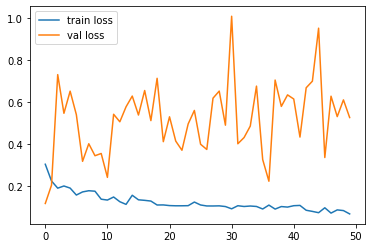

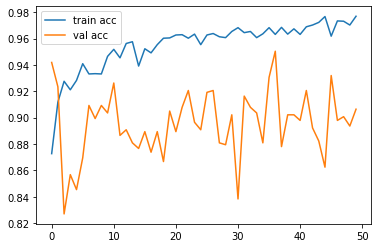

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:

y_pred = model.predict(test_set)
y_pred

array([[3.1193201e-07, 9.9999964e-01, 1.1599118e-18, 3.3487708e-18],
       [5.1479852e-05, 9.9994850e-01, 3.7511857e-17, 3.8960951e-17],
       [7.0767265e-07, 9.9999928e-01, 1.3307946e-17, 1.9445112e-17],
       ...,
       [5.6156685e-05, 9.9994385e-01, 8.1805317e-17, 9.6723559e-17],
       [9.0745370e-06, 9.9999094e-01, 6.1032185e-17, 8.7265986e-17],
       [2.9728430e-05, 9.9997032e-01, 5.8668000e-18, 7.8789971e-18]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg16.h5')
img=image.load_img('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg',target_size=(224,224))
x=image.img_to_array(img)
x


array([[[ 95.,  95.,  95.],
        [ 98.,  98.,  98.],
        [ 99.,  99.,  99.],
        ...,
        [ 72.,  72.,  72.],
        [ 68.,  68.,  68.],
        [ 65.,  65.,  65.]],

       [[101., 101., 101.],
        [105., 105., 105.],
        [105., 105., 105.],
        ...,
        [ 70.,  70.,  70.],
        [ 67.,  67.,  67.],
        [ 66.,  66.,  66.]],

       [[107., 107., 107.],
        [106., 106., 106.],
        [107., 107., 107.],
        ...,
        [ 70.,  70.,  70.],
        [ 68.,  68.,  68.],
        [ 66.,  66.,  66.]],

       ...,

       [[ 65.,  65.,  65.],
        [ 70.,  70.,  70.],
        [ 78.,  78.,  78.],
        ...,
        [ 61.,  61.,  61.],
        [ 57.,  57.,  57.],
        [ 51.,  51.,  51.]],

       [[ 67.,  67.,  67.],
        [ 71.,  71.,  71.],
        [ 77.,  77.,  77.],
        ...,
        [ 61.,  61.,  61.],
        [ 58.,  58.,  58.],
        [ 51.,  51.,  51.]],

       [[ 67.,  67.,  67.],
        [ 69.,  69.,  69.],
        [ 77.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
predicted = model.predict(img_data)

In [ ]:
predicted_value=np.argmax(predicted, axis=1)
predicted_value

array([0])

### Model-6

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
import os

#data_generators

train_datagen = image.ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)

test_datagen = image.ImageDataGenerator(rescale=1./255)


#train_set ,test_set

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
                                              target_size = (224,224), #The dimensions to which all images found will be resized   
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode = 'categorical')

#VGG19 model ,Flatten_layer ,prediction_layer

VGG = VGG19(input_shape =[224,224,3],weights='imagenet',include_top=False,)

for layers in VGG.layers:
    layers.trainable=False

Flatten_layer = Flatten()

prediction_layer =  Dense(4,activation='softmax')

#build & compile the model

model =  Sequential([VGG,Flatten_layer,prediction_layer])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


#Train the model

model.fit(train_set
          ,validation_data=test_set
          ,epochs=5,
          steps_per_epoch=len(train_set),
          validation_steps=len(test_set))


KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/My Drive/models/RPS_game.h5')
import tensorflow as tf
from tensorflow import keras
new_model = keras.models.load_model('/content/drive/My Drive/models/RPS_game.h5')
new_model.summary()

In [ ]:
from keras.preprocessing import image
import numpy as np
image_original = image.load_img('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg',target_size=(224,224))
img = image.img_to_array(image_original)
img = np.expand_dims(img,axis=0)
predictions = new_model.predict(img)
index = np.argmax(predictions[0])
label = ['Covid-19','Normal','STB-NATB','Pneumonia']
import matplotlib.pyplot as plt
plt.imshow(image_original)
plt.title(label[index])
plt.show()

In [ ]:
print('prediction is:',label[index])

## Model-7

In [2]:
# import the necessary packages
#%tensorflow_version 2.x
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
%matplotlib inline

In [3]:
# initialize directory 
dataset="/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train"

dataset_dir = os.path.join(dataset)

model_name="covid19.model"

In [4]:
args={}
args["dataset"]=dataset

In [5]:
train_covid_dir     = os.path.join(dataset_dir, 'Covid-19')  # directory with our training Covid pictures
train_Normal_dir    = os.path.join(dataset_dir, 'Normal')  # directory with our training Normal pictures
train_natb_dir    = os.path.join(dataset_dir, 'STB-NATB')  # directory with our training STB-NATB pictures
train_pneumonia_dir    = os.path.join(dataset_dir, 'Viral Pneumonia')   # directory with our training Pneumonia pictures

num_covid_dir     = len(os.listdir(train_covid_dir))
num_Normal_dir    = len(os.listdir(train_Normal_dir))
num_natb_dir    = len(os.listdir(train_natb_dir))
num_pneumonia_dir    = len(os.listdir(train_pneumonia_dir))


print('Total Train Covid-19  images:', num_covid_dir)
print('Total Train Normal    images:', num_Normal_dir)
print('Total Train STB-NATB    images:', num_natb_dir)
print('Total Train Pneumonia    images:', num_pneumonia_dir)


os.listdir(dataset)

Total Train Covid-19  images: 2251
Total Train Normal    images: 2251
Total Train STB-NATB    images: 2292
Total Train Pneumonia    images: 2305


['Covid-19', 'STB-NATB', 'Normal', 'Viral Pneumonia']

In [6]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')
BS = 2
batch_size = BS
train_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
                                               target_size=(224,224,3),
                                               batch_size=2,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
                                               target_size=(224,224,3),
                                               batch_size=2,
                                               class_mode='categorical')



Found 9095 images belonging to 4 classes.
Found 2973 images belonging to 4 classes.


In [7]:
train_image_gen.class_indices

{'Covid-19': 0, 'Normal': 1, 'STB-NATB': 2, 'Viral Pneumonia': 3}

In [8]:
# dataset_path = '//content/drive/MyDrive/Dr. Amani/Classification/Dataset CT CuncerLung/'
import glob
dataset_path = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train'
image_paths=[image_path for image_path in glob.glob(dataset_path+'/*/*')]
image_categories=[os.path.basename(os.path.dirname(image_path)) for image_path in image_paths]
filenames=[os.path.basename(image_path) for image_path in image_paths]

In [9]:
import pandas as pd

dataset_df = pd.DataFrame({'image_paths':image_paths,'filename':filenames,'image_category':image_categories})
dataset_df.sort_values('image_category',inplace=True)
dataset_df.tail(3)

,image_paths,filename,image_category
7565,/content/drive/MyDrive/Dr. Amani/Classificatio...,Pneumonia (653).jpg,Viral Pneumonia
7369,/content/drive/MyDrive/Dr. Amani/Classificatio...,Pneumonia (844).jpg,Viral Pneumonia
9098,/content/drive/MyDrive/Dr. Amani/Classificatio...,Pneumonia (142).jpg,Viral Pneumonia


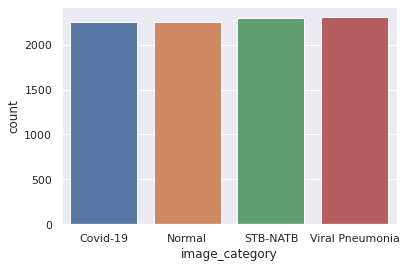

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="image_category", data=dataset_df)

In [11]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 5
BS = 15

In [12]:
imagePaths = list(paths.list_images(dataset))
data = []
labels = []

In [2]:
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)


NameError: ignored

In [1]:
labels.shape


NameError: ignored

In [ ]:
labels[5]

In [ ]:
print(labels)

In [ ]:
labels[1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
num_labels=le.fit_transform(labels)
cat_labels=le.inverse_transform(num_labels)

In [ ]:
num_labels.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder(sparse=False)
num_labels=num_labels.reshape(len(num_labels),1)
onehot_encoded=onehot_encoder.fit_transform(num_labels)

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
#labels = lb.fit_transform(labels [:,None])
labels = to_categorical(num_labels )

In [ ]:


# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, onehot_encoded,test_size=0.20, stratify=labels, random_state=42)

# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [ ]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



In [ ]:
# train the head of the network
print("[INFO] training head...")
EPOCHS = 10
BS = 64
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

In [ ]:
import seaborn as sns
predicted_metrics = model.evaluate(testX, testY,batch_size=BS, verbose=0)
for name, value in zip(model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print()

#plot_cm(trueIdxs, predIdxs)
#plt.savefig('confusion_matrix.pdf', format='pdf')

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

#target_names=lb.inverse_transform

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

In [ ]:
def plot_cm(labels, predictions):
    '''
    Plot the confusion matrix
    '''
    print(classification_report(labels, predictions))
    #target_names=lb.classes_
    cm = confusion_matrix(labels, predictions)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print("accuracy: {:.4f}".format(acc))
    print("sensitivity: {:.4f}".format(sensitivity))
    print("specificity: {:.4f}".format(specificity))
    print()
    print('Correct Healthy Patient Detection (True Negatives): ', cm[0][0])
    print('Incorrect LUNG Detection (False Positives): ', cm[0][1])
    print('Incorrect Healthy Patient Detection (False Negatives): ', cm[1][0])
    print('Correct LUNG Detection (True Positives): ', cm[1][1])
    print('Total Patietns with LUNG: ', np.sum(cm[1]))

    print()
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
# Make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
print('\nNumber of test scans: ', len(testX))
print('Predicted class probabilities:')
print(predIdxs)

    
# Find the predicted labels 
predIdxs = np.argmax(predIdxs, axis=1)
print('\nPredicted outcome (Normal=0, lung=1):')
print(predIdxs)
print('Ground-truth outcome:')
# print(testY)
trueIdxs = np.argmax(testY, axis=1)
print(trueIdxs)



In [ ]:
import seaborn as sns
predicted_metrics = model.evaluate(testX, testY,batch_size=BS, verbose=0)
for name, value in zip(model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print()

plot_cm(trueIdxs, predIdxs)
#plt.savefig('confusion_matrix.pdf', format='pdf')

In [ ]:
N = len(H.history["loss"])
plt.style.use("ggplot")
plt.figure(figsize = (20,10))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss", color = 'firebrick')
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss", color = 'salmon')
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc", color = 'teal')
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc",color = 'cadetblue')
plt.plot( np.argmin(H.history["val_loss"]), np.min(H.history["val_loss"]), marker="x", color="r", label="best model")
plt.title("Training Loss and Accuracy on LUNG Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig('loss_curve.pdf', format='pdf')
plt.show()

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on LUNG Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("plot.png")

In [ ]:
from keras.callbacks import ModelCheckpoint,History,EarlyStopping,LearningRateScheduler
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# serialize the model to disk
print("[INFO] saving LUNG detector model...")
model.save(model_name, save_format="h5")
model.save('FullModelDetect_Kovid_Ardabil.h5')
print("Saved Model : Detect_LUNG_Ardabil in Folder Successfuly")


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import load_model
import matplotlib.pyplot as plt

#model=load_model("/content/drive/My Drive/covid19-dataset/covid191.h5")
_img=load_img("/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg",target_size=(224,224))
img=img_to_array(_img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)
#plt.subplot(1,2,1)
plt.imshow(_img)
#plt.subplot(1,2,2)
#plt.imshow(img)
plt.show()
features=model.predict(img)

print('acc : =' ,acc )
#print('Prediction : =' ,predict )
#print('Actual : =' ,predict )
#for GradCAM
class_idxs_sorted = np.argsort(features.flatten())[::-1]

## Model-8

In [3]:
from keras.applications import VGG19
vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


80142336/80134624 [==============================] - 0s 0us/step


In [4]:
from keras.preprocessing.image import ImageDataGenerator
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False
 
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff47467afd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff4692dcd90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff468bee7d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff468b8cbd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff468b8ef90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff468b91090> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff460005e50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff46000ef90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff460011e90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff460018f10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff460022f10> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [10]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
 
model.add(vgg_conv)
 
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 46,242,372
Trainable params: 28,577,796
Non-trainable params: 17,664,576
_________________________________

In [11]:
train_dir = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train'
validation_dir = '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test'

In [15]:
import numpy as np
from random import shuffle
train_datagen = ImageDataGenerator(
      rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
  height_shift_range=0.2,
    horizontal_flip=True,
   fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_batchsize = 32
val_batchsize = 20
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 9095 images belonging to 4 classes.
Found 2973 images belonging to 4 classes.


In [16]:
print(train_generator.class_indices)

{'Covid-19': 0, 'Normal': 1, 'STB-NATB': 2, 'Viral Pneumonia': 3}


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
284/284 [==============================] - 215s 733ms/step - loss: 0.2843 - acc: 0.7499 - val_loss: 0.6210 - val_acc: 0.3377
Epoch 2/20
284/284 [==============================] - 208s 731ms/step - loss: 0.2747 - acc: 0.7591 - val_loss: 0.5449 - val_acc: 0.3700
Epoch 3/20
284/284 [==============================] - 208s 734ms/step - loss: 0.2659 - acc: 0.7596 - val_loss: 0.5694 - val_acc: 0.3475
Epoch 4/20
284/284 [==============================] - 208s 732ms/step - loss: 0.2627 - acc: 0.7708 - val_loss: 0.7213 - val_acc: 0.3720
Epoch 5/20
284/284 [==============================] - 208s 732ms/step - loss: 0.2723 - acc: 0.7661 - val_loss: 0.6566 - val_acc: 0.3535
Epoch 6/20
284/284 [==============================] - 208s 732ms/step - loss: 0.2677 - acc: 0.7630 - val_loss: 0.5973 - val_acc: 0.3525
Epoch 7/20
284/284 [==============================] - 209s 734ms/step - loss: 0.2647 - acc: 0.7756 - val_loss: 0.7072 - val_acc: 0.3656
Epoch 8/20
284/284 [============================

In [18]:
model.save('anuvgg19.h5')

In [19]:
import numpy as np
import keras 
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
model = load_model('anuvgg19.h5')

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 46,242,372
Trainable params: 28,577,796
Non-trainable params: 17,664,576
_________________________________

In [21]:
from keras import models
from keras import layers
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
img3 = cv2.imread('/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Covid (2251).jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])


In [23]:
disease = model.predict_classes(img4)
prediction = disease[0]
print(prediction)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1


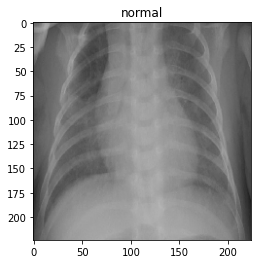

In [25]:
reverse_mapping = ['covid-19','normal','pneumonia','STb_NATB']
prediction_name = reverse_mapping[prediction]
# prediction_name
plt.imshow(img3)
plt.title(prediction_name)
plt.show()

# Model-9

In [26]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras as kf
import cv2
import numpy as np

In [27]:
# creating data generator for training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# creating data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
# loading the training data after required modifications
train_data = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Train',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        color_mode = 'rgb')

# loading validation data after required modifications
validation_data = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dr. Amani/Classification/Classification of Covid-Penomonia-Tuberculosis/Test',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        color_mode = 'rgb')

Found 9095 images belonging to 4 classes.
Found 2973 images belonging to 4 classes.


In [43]:
# making the convolutional model iusing VGG19 architecture
conv_model = tf.keras.applications.VGG19(
    include_top= False,
    weights="imagenet",
    input_tensor=None,
    input_shape= [224, 224] + [3],
    pooling=None,
)

In [44]:
# making classifier

# flattening the output of the convolutional part
x = kf.layers.Flatten()(conv_model.output)

# three hidden layers
x = kf.layers.Dense(100, activation='relu')(x)
x = kf.layers.Dense(100, activation='relu')(x)
x = kf.layers.Dense(100, activation='relu')(x)

# output layer
predictions = kf.layers.Dense(4, activation='softmax')(x)

In [45]:
# attaching both the convolutional model and the classification model
full_model = kf.models.Model(inputs=conv_model.input, outputs=predictions)
# printing the summary of the full model (convolutional model and classification model)
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [46]:
# making CNN training false
for layer in conv_model.layers:
  layer.trainable = False

In [47]:
# complling the model
full_model.compile(loss='categorical_crossentropy',
                  optimizer=kf.optimizers.Adamax(lr=0.001),
                  metrics=['accuracy'])

In [48]:
# fitting data into the final model using .fit_generator function
# .fit_generator function is being used for handling huge data
results = full_model.fit_generator(
  train_data,
  validation_data= validation_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(validation_data)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
143/143 [==============================] - 207s 1s/step - loss: 1.1615 - accuracy: 0.5059 - val_loss: 1.3155 - val_accuracy: 0.3552
Epoch 2/15
143/143 [==============================] - 203s 1s/step - loss: 0.8214 - accuracy: 0.6707 - val_loss: 1.3234 - val_accuracy: 0.3629
Epoch 3/15
143/143 [==============================] - 202s 1s/step - loss: 0.7503 - accuracy: 0.6999 - val_loss: 1.3748 - val_accuracy: 0.3707
Epoch 4/15
143/143 [==============================] - 202s 1s/step - loss: 0.7264 - accuracy: 0.7061 - val_loss: 1.3625 - val_accuracy: 0.3656
Epoch 5/15
143/143 [==============================] - 202s 1s/step - loss: 0.6912 - accuracy: 0.7271 - val_loss: 1.4287 - val_accuracy: 0.3505
Epoch 6/15
143/143 [==============================] - 204s 1s/step - loss: 0.6609 - accuracy: 0.7382 - val_loss: 1.5458 - val_accuracy: 0.3475
Epoch 7/15
143/143 [==============================] - 201s 1s/step - loss: 0.6453 - accuracy: 0.7463 - val_loss: 1.4806 - val_accuracy: 0.3639

In [49]:
# saving the trained model
# accuracy 97.96 %
filepath = './model_trained/model_1.h5'
full_model.save(filepath)

# ** THE END**